In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from bounce import state
from bounce import driver
import numpy as np

In [3]:
label = 'Emcee package test'
N_walkers = 20
N_iterations = 325*N_walkers
emcee_init_scale = {"m":0.00001, "a":.01, "h":0.001, "k":0.001, "l":0.01*2.*np.pi}

In [4]:
initial_state = state.State(planets=[{"m":0.001, "a":0.1, "h":0.1, "k":0.15, "l":1.0}])
initial_state.hillRadiusFactor = 1.

np.random.seed(2018)
obs = driver.create_obs(initial_state, 100, 5.0e-4, 5.0e-5, 1.0)

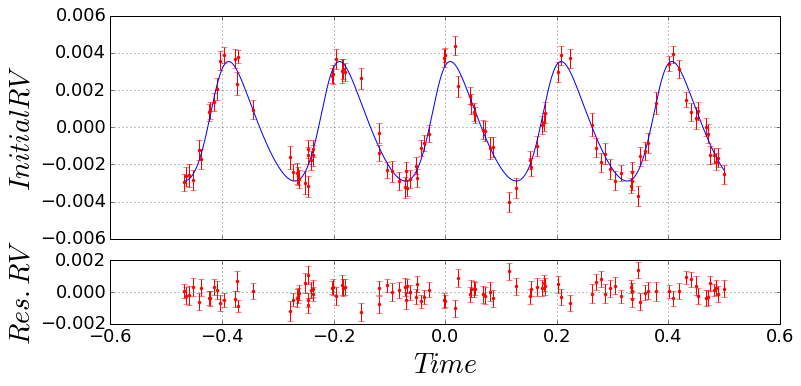

In [5]:
%matplotlib inline
driver.plot_obs(initial_state, obs, [12,4])

In [6]:
np.random.seed()
emcee_bundle, emcee_bundle_hash = driver.run_emcee(label, 
                                                   N_iterations, 
                                                   initial_state, 
                                                   obs,
                                                   N_walkers,
                                                   emcee_init_scale,
                                                   printing_every=100)

Progress: 0.30769%, time: 2017-10-06 22:25:15.467828
Progress: 31.077%, time: 2017-10-06 22:25:29.436446
Invalid state was proposed (m)
Progress: 61.846%, time: 2017-10-06 22:25:43.386242
Collision! 2017-10-06 22:25:45.149732
Collision! 2017-10-06 22:25:53.306287
Collision! 2017-10-06 22:25:56.246729
Progress: 92.615%, time: 2017-10-06 22:25:58.967455
Error(s): 0
Acceptance rate: 57.323%
The id of the simulation is: 73c2b91d82dc5f3242d4aa3a78e0d594
The end time of the simulation is 2017-10-06 22:26:03.542809


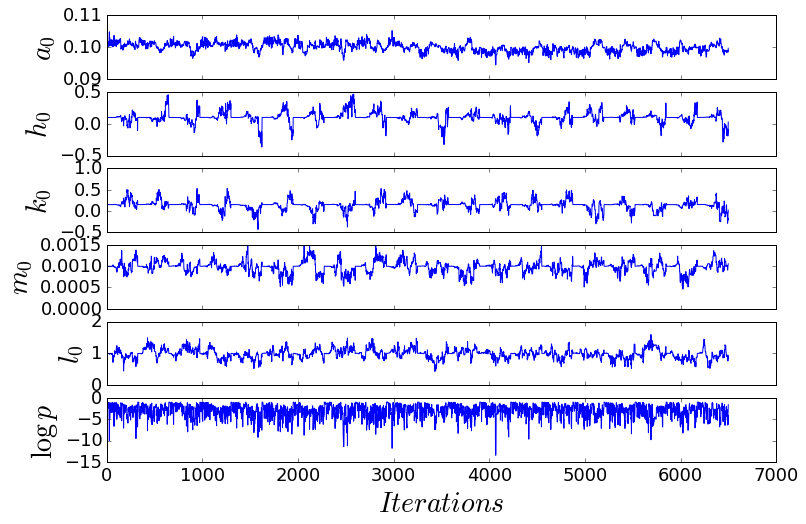

In [7]:
driver.plot_chains(emcee_bundle, [12,8])

In [8]:
driver.return_trimmed_results(emcee_bundle, 40, [12,4], 0.7, plotting=False)

Eliminated burn in, sampled every 1.


Selected some 20 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$m_0$', '$l_0$']
[  1.00059115e-01   1.01542741e-01   1.39121152e-01   9.82360519e-04
   9.90116363e-01]


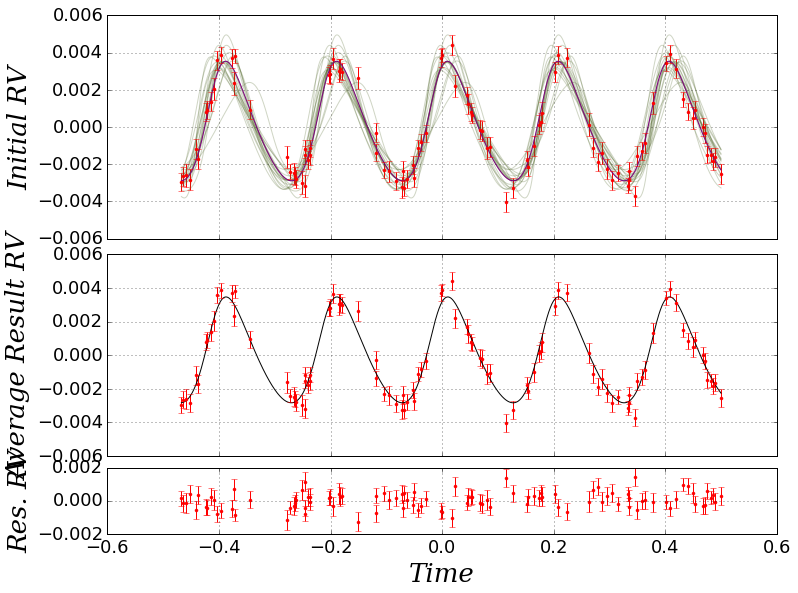

In [9]:
driver.plot_trimmed_results(emcee_bundle, 20, [12,4])